Decision Tree Accuracy: 0.25
Naive Bayes Accuracy: 0.25
Random Forest Accuracy: 0.5


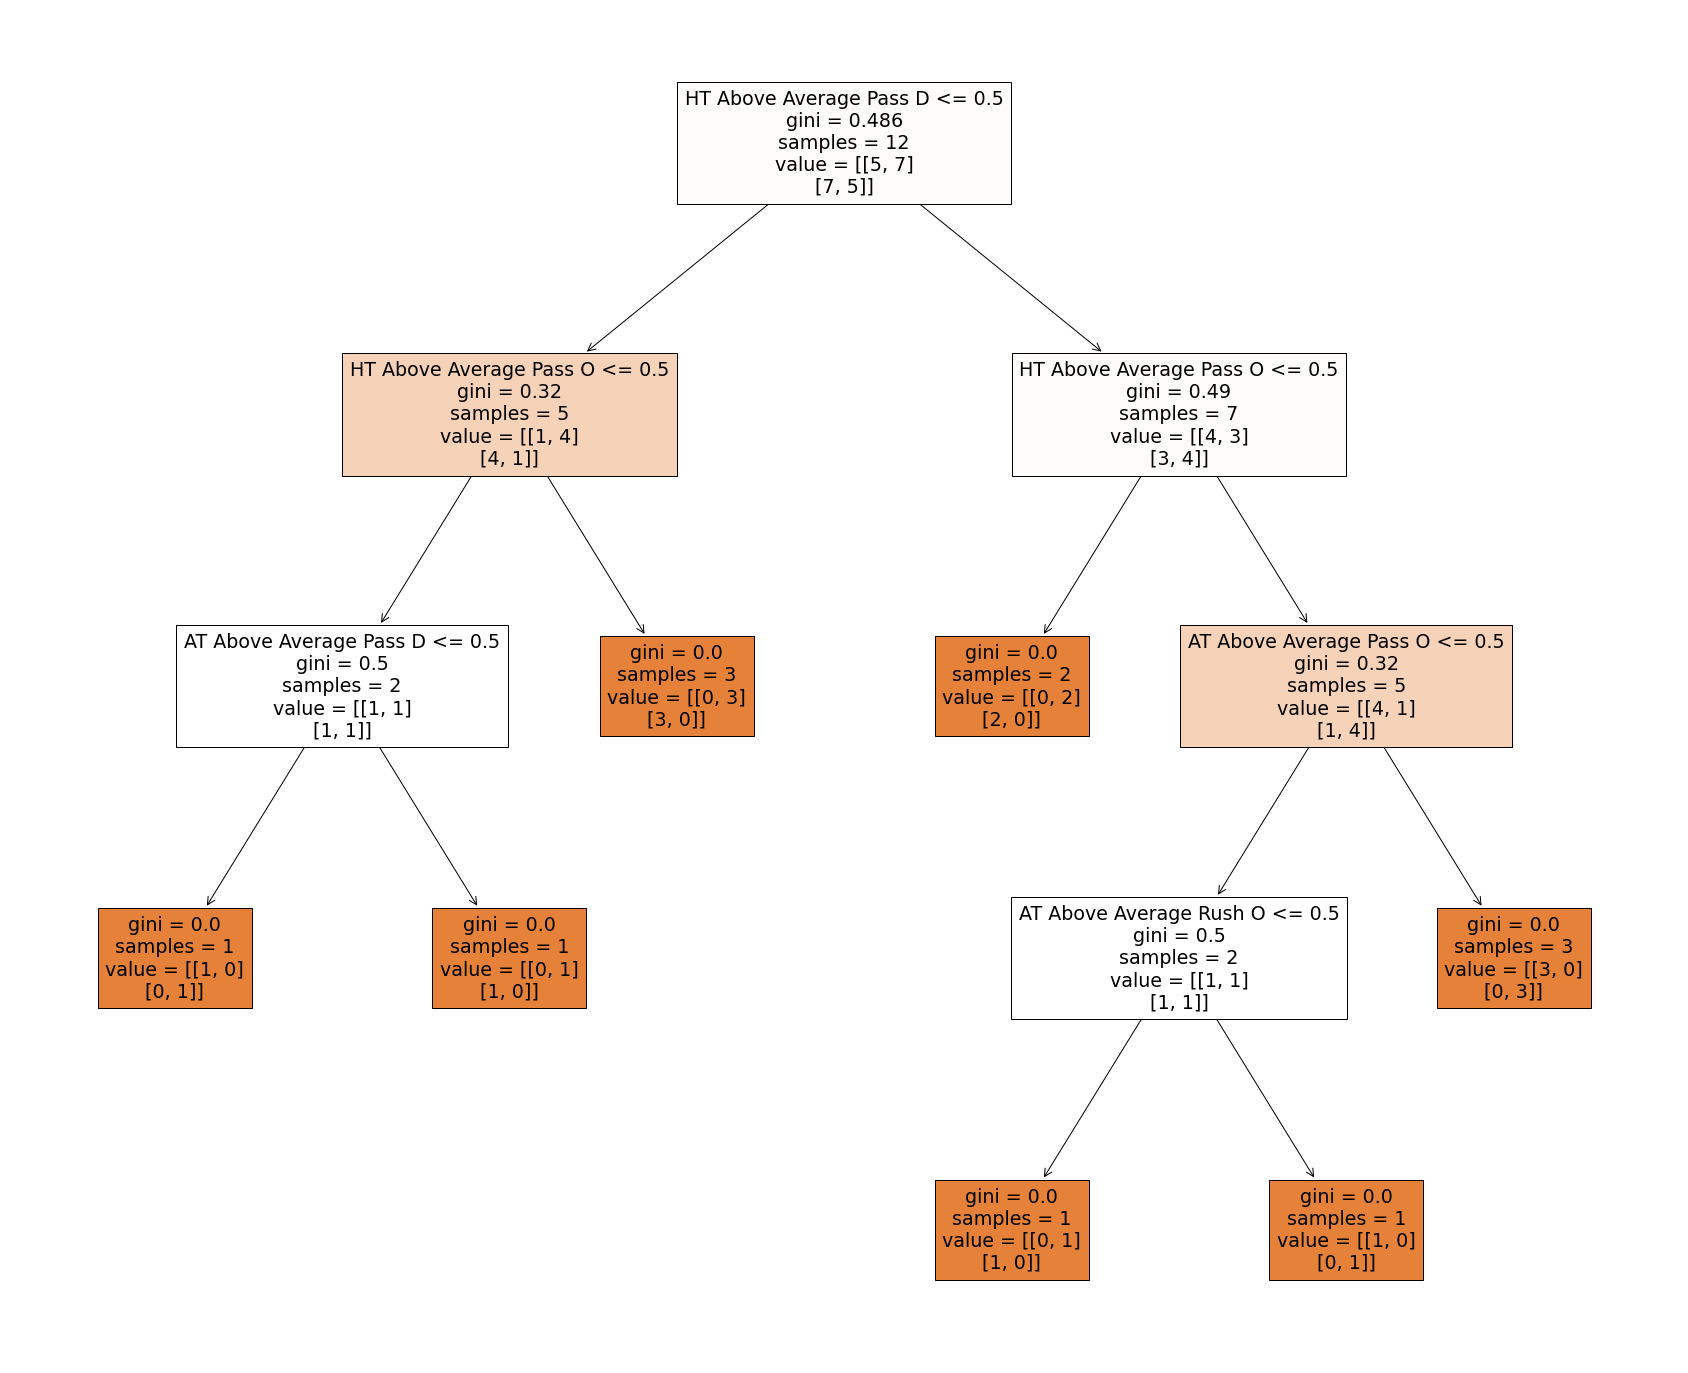

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics  
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt

#### Read in Data ####
#### Data sourced from Footballdb.com ####
pass_df = pd.read_csv('PassRippedData.csv')
rush_df = pd.read_csv('RushRippedData.csv') 
passD_df = pd.read_csv('Pass_DRippedData.csv') 
rushD_df = pd.read_csv('Rush_DRippedData.csv')
matchup_df = pd.read_csv('matchup2.csv')
teamlist_df = pd.read_csv('teamlist.csv')

teamlist_df = teamlist_df.drop('Unnamed: 5', axis=1)

#### PASSING OFFENSE ####

pass_yards_pg = pass_df['Yds/G']

avg_o_passing = 0
for x in pass_yards_pg:
    avg_o_passing += int(x)

avg_o_passing = int(avg_o_passing / 32)

for x in pass_yards_pg:
    if x > avg_o_passing:
        pass_yards_pg.replace(x, 1, inplace=True)

for x in pass_yards_pg:
    if x > 2:
        pass_yards_pg.replace(x, 0, inplace=True)

#print(pass_yards_pg)

#### RUSHING OFFENSE ####

rush_yards_pg = rush_df['Yds/G']

avg_o_rushing = 0
for x in rush_yards_pg:
    avg_o_rushing += int(x)

avg_o_rushing = int(avg_o_rushing / 32)

for x in rush_yards_pg:
    if x > avg_o_rushing:
        rush_yards_pg.replace(x, 1, inplace=True)

for x in rush_yards_pg:
    if x > 2:
        rush_yards_pg.replace(x, 0, inplace=True)

#print(rush_yards_pg)

#### PASS DEFENSE ####

pass_yards_apg = passD_df['Yds/G']

avg_a_passing = 0
for x in pass_yards_apg:
    avg_a_passing += int(x)

avg_a_passing = int(avg_a_passing / 32)

for x in pass_yards_apg:
    if x < avg_a_passing:
        pass_yards_apg.replace(x, 1, inplace=True)

for x in pass_yards_apg:
    if x > 2:
        pass_yards_apg.replace(x, 0, inplace=True)

#print(pass_yards_apg)

#### RUSH DEFENSE ####

rush_yards_apg = rushD_df['Yds/G']

avg_a_rushing = 0
for x in rush_yards_apg:
    avg_a_rushing += int(x)

avg_a_rushing = int(avg_a_rushing / 32)

for x in rush_yards_apg:
    if x < avg_a_rushing:
        rush_yards_apg.replace(x, 1, inplace=True)

for x in rush_yards_apg:
    if x > 2:
        rush_yards_apg.replace(x, 0, inplace=True)
        
#print(rushD_df)

#### Create Data Frame with match ups ####
# Above Average Rush O Above Average Pass O Above Average Rush D Above Average Pass D
#Create dataframe with each team and their four stats 
teamlist_df['Above Average Rush O'] = rush_df['Yds/G']
teamlist_df['Above Average Pass O'] = pass_df['Yds/G']
teamlist_df['Above Average Rush D'] = rushD_df['Yds/G']
teamlist_df['Above Average Pass D'] = passD_df['Yds/G']

teamlist_df = teamlist_df.set_index('Team')

matchup_rushO = []
matchup_passO = []
matchup_rushD = []
matchup_passD = []

for x in matchup_df['Home Team']:
    matchup_rushO.append(teamlist_df.loc[x,'Above Average Rush O'])
    matchup_passO.append(teamlist_df.loc[x,'Above Average Pass O'])
    matchup_rushD.append(teamlist_df.loc[x,'Above Average Rush D'])
    matchup_passD.append(teamlist_df.loc[x,'Above Average Pass D'])
    
matchup_df['HT Above Average Rush O'] = matchup_rushO
matchup_df['HT Above Average Pass O'] = matchup_passO
matchup_df['HT Above Average Rush D'] = matchup_rushD
matchup_df['HT Above Average Pass D'] = matchup_passD

matchup_rushO = []
matchup_passO = []
matchup_rushD = []
matchup_passD = []

for x in matchup_df['Away Team']:
    matchup_rushO.append(teamlist_df.loc[x,'Above Average Rush O'])
    matchup_passO.append(teamlist_df.loc[x,'Above Average Pass O'])
    matchup_rushD.append(teamlist_df.loc[x,'Above Average Rush D'])
    matchup_passD.append(teamlist_df.loc[x,'Above Average Pass D'])
    
matchup_df['AT Above Average Rush O'] = matchup_rushO
matchup_df['AT Above Average Pass O'] = matchup_passO
matchup_df['AT Above Average Rush D'] = matchup_rushD
matchup_df['AT Above Average Pass D'] = matchup_passD

### Classifier Time ###
matchup_df.replace('0', 0, inplace=True) # make everything binary
matchup_df.replace('1', 1, inplace=True)

matchup_df2 = matchup_df.drop('Home Team Win', axis=1) 
matchup_df2 = matchup_df2.drop('Home Team', axis=1) 
matchup_df2 = matchup_df2.drop('Away Team', axis=1) 

### Decision Tree ###

x = matchup_df2
y = matchup_df['Home Team Win']

y = pd.get_dummies(y) 

xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1) # Splitting the data 

dtc = DecisionTreeClassifier() # creating the Decision Tree

dtc.fit(xTrain, yTrain) # inputing the training model

ig = plt.figure(figsize=(30,25)) # outputting the Tree 
_ = tree.plot_tree(dtc, feature_names = matchup_df2.columns, class_names = True, filled=True )

yPred = dtc.predict(xTest) # Running the tree with all the data 

print("Decision Tree Accuracy:", metrics.accuracy_score(yTest, yPred)) # running test vs training for accuracy 


### Naive Bayes ###

y = matchup_df['Home Team Win']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1) # Splitting the data 

gnb = GaussianNB()

gnb.fit(xTrain, yTrain)

yPred = gnb.predict(xTest)

print("Naive Bayes Accuracy:", metrics.accuracy_score(yTest, yPred)) # 

### Random Forest ###

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(xTrain, yTrain)

yPred = clf.predict(xTest)

print("Random Forest Accuracy:", metrics.accuracy_score(yTest, yPred)) # 

#passD_df
# What will be the main responsiblities within this role
# Theres only a limited amount of information about the company online 
#and I was wondering what inspired you to found Vector Analytics
# What is your intern retention rate?